# 10.1 Unsupervised Learning with k-Means Clustering

This example illustrates clusting on the MNIST and DIGITS image data using the k-Means clustering algorithm. This is done with Unsupervised Learning, without using the label that is provided for each sample. We will use the labels only for visualization.

In [1]:
# Mount GDrive, change directory and check contents of folder.

import os
from google.colab import drive
from google.colab import files

PROJECT_FOLDER = "/content/gdrive/My Drive/Colab Notebooks/CS345_SP22/10. Clustering"

drive.mount('/content/gdrive/')
os.chdir(PROJECT_FOLDER)
print("Current dir: ", os.getcwd())

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/gdrive/
Current dir:  /content/gdrive/My Drive/Colab Notebooks/CS345_SP22/10. Clustering


# Dataset loading
Load either MNIST or DIGITS.

In [2]:
from data.digits import CDIGITSDataSet
from data.mnist import CMNISTDataSet

# _____// Data Hyperparameters \\_____
IS_MNIST = True
SAMPLE_COUNT = 1500  # How many samples to use from the available population in the dataset

if IS_MNIST:
  oMNIST  = CMNISTDataSet()
  sDataName  = "MNIST"
  nSamples   = oMNIST.TSSamples[:SAMPLE_COUNT,:]
  nLabels    = oMNIST.TSLabels[:SAMPLE_COUNT]
else:
  sDataName = "DIGITS"
  oDIGITS = CDIGITSDataSet() 
  nSamples   = oDIGITS.TSSamples[:SAMPLE_COUNT,:]
  nLabels    = oDIGITS.TSLabels[:SAMPLE_COUNT]

print("Loaded %s dataset" % sDataName)
print("Training set shape:", nSamples.shape)
print("Class count:", len(np.unique(nLabels)))

Loaded MNIST dataset
Training set shape: (1500, 784)
Class count: 10


# Data Preprocessing.
We transform the values of our features with **standardization**, that "centers" the mean value for each to 0, lesser values will be negative and greater will be positive. A new value of 1 will mean that its distance from mean is exactly σ the standard deviation.

In [3]:
from sklearn.preprocessing import StandardScaler

print("First sample in dataset, features 40-100, before standardization")

# Standardization
nSampleIndex = 0
nFromFeature = 140
nToFeature = 160

oScaler = StandardScaler()
nStandardizedSamples = oScaler.fit_transform(nSamples)

print("Sample#1 original features %d-%d" % (nFromFeature, nToFeature))
print(nSamples[nSampleIndex,nFromFeature:nToFeature])
print("Mean μ of features %d-%d over %d samples" % (nFromFeature, nToFeature, SAMPLE_COUNT))
print(oScaler.mean_[nFromFeature:nToFeature])
print("Std σ of features %d-%d over %d samples" % (nFromFeature, nToFeature, SAMPLE_COUNT))
print(oScaler.scale_[nFromFeature:nToFeature])
print("Sample#1 standardized features %d-%d" % (nFromFeature, nToFeature))
print(nStandardizedSamples[nSampleIndex,nFromFeature:nToFeature])

First sample in dataset, features 40-100, before standardization
Sample#1 original features 140-160
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26]
Mean μ of features 140-160 over 1500 samples
[ 0.          0.          0.          0.18666667  0.566       1.20066667
  2.53        4.70866667  8.21066667 13.726      22.674      34.18066667
 45.42333333 59.71866667 75.60466667 85.63866667 89.23333333 85.154
 74.76933333 59.318     ]
Std σ of features 140-160 over 1500 samples
[  1.           1.           1.           6.59725869  10.13490556
  15.76093481  21.74549225  30.28924658  39.00302065  50.01719962
  63.7280555   77.14180898  86.90337233  96.2725758  104.39117002
 106.53054071 108.52838134 107.71957862 104.45116942  95.89996633]
Sample#1 standardized features 140-160
[ 0.          0.          0.         -0.02829458 -0.0558466  -0.07617991
 -0.11634595 -0.15545671 -0.21051361 -0.2744256  -0.35579306 -0.44308874
 -0.48816671 -0.43333905 -0.55181551 -

# Dimensionality Reduction.
In order to understanding clustering, we would like to visualize the clusters in a 2D space. For this reason we will decrease the initial dimensionality of the image that is 28x28 = 784 to just 2 features, using one of the PCA and t-SNE algorithms.

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# _____// Dimensionality Reduction Hyperparameters \\_____
COMPONENTS = 2
IS_LINEAR_DIM_REDUCTION = False

# ... Dimensionality Reduction Hyperparameters ...
PERPLEXITY      = 100.0
LEARNING_RATE   = 1000.0
EPOCHS          = 1000
GRADIENT_CALCULATION_ALGORITHM = "barnes_hut" #Fast

if IS_LINEAR_DIM_REDUCTION:
  sDimReductionMethod = "PCA"
  nReducedSamples  = PCA(n_components=COMPONENTS).fit_transform(nStandardizedSamples)
else:
  sDimReductionMethod = "t-SNE"
  oTSNE = TSNE( n_components=COMPONENTS
                ,perplexity=PERPLEXITY, n_iter=EPOCHS
                ,method=GRADIENT_CALCULATION_ALGORITHM
                ,verbose=2
                )
  nReducedSamples  = oTSNE.fit_transform(nStandardizedSamples)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.001s...
[t-SNE] Computed neighbors for 1500 samples in 0.193s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 8.704674
[t-SNE] Computed conditional probabilities in 0.350s
[t-SNE] Iteration 50: error = 58.7521744, gradient norm = 0.0986988 (50 iterations in 1.667s)
[t-SNE] Iteration 100: error = 58.6546097, gradient norm = 0.0864145 (50 iterations in 1.379s)
[t-SNE] Iteration 150: error = 58.6604958, gradient norm = 0.0881606 (50 iterations in 1.423s)
[t-SNE] Iteration 200: error = 58.7812614, gradient norm = 0.0788674 (50 iterations in 1.681s)
[t-SNE] Iteration 250: error = 58.7093620, gradient norm = 0.0852637 (50 iterations in 1.429s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.709362
[t-SNE] Iteration 300: error = 1.0905797, gradient norm = 0.0012532 (50 iterations in 0.934s

# Visualization of Known Classes
We visualize the samples as points in the 2D space using a different color for each class.

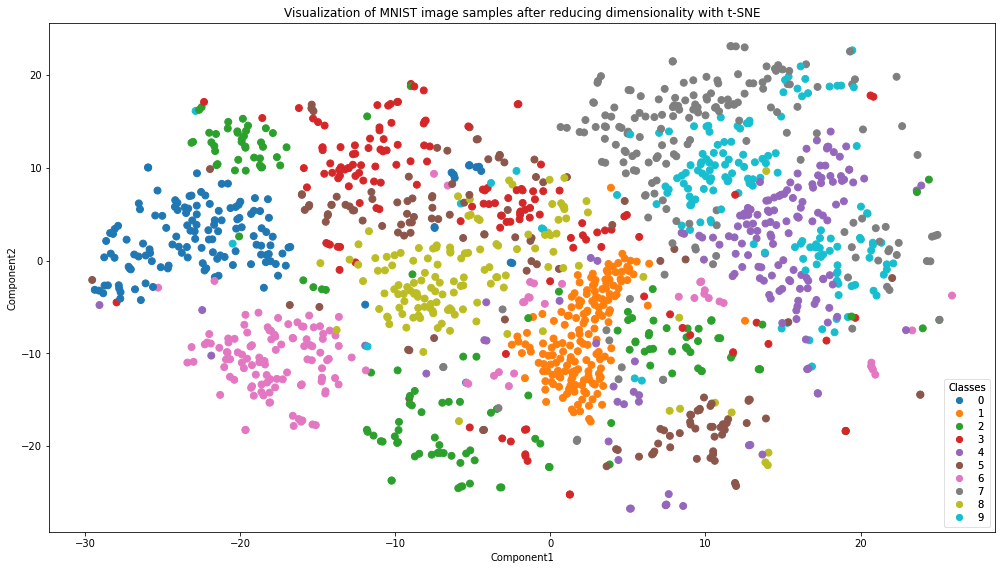

In [5]:
from mllib.visualization import CMultiScatterPlot

oPlot = CMultiScatterPlot("Visualization of %s image samples after reducing dimensionality with %s" % (sDataName, sDimReductionMethod))
oPlot.AddData("",nReducedSamples , nLabels)
oPlot.Show(0, "Component1", "Component2")

# Training
Learn a k-Means clustering model.



In [12]:
from sklearn.cluster import KMeans

# _____// Clustering Hyperparameters \\_____
NUM_RUNS_RANDOM_CENTROIDS = 4
RANDOM_SEED               = 2021
CLUSTER_COUNT_K           = 40

nReducedSamples = nReducedSamples.astype(np.float64)
oClusteringModel = KMeans(init="k-means++", n_clusters=CLUSTER_COUNT_K, n_init=NUM_RUNS_RANDOM_CENTROIDS, verbose=2)
oClusteringModel.fit(nSamples)

Initialization complete
Iteration 0, inertia 4660928366.0
Iteration 1, inertia 3021298303.5984344
Iteration 2, inertia 2927837666.330956
Iteration 3, inertia 2897768343.4872956
Iteration 4, inertia 2884087987.7868776
Iteration 5, inertia 2875828366.8853045
Iteration 6, inertia 2870030240.9956827
Iteration 7, inertia 2865545079.827378
Iteration 8, inertia 2864167704.2198706
Iteration 9, inertia 2863136652.2782116
Iteration 10, inertia 2861014654.8347435
Iteration 11, inertia 2858894702.2051716
Iteration 12, inertia 2857829678.664462
Iteration 13, inertia 2857368447.6526537
Iteration 14, inertia 2856396644.6666746
Iteration 15, inertia 2855718125.443995
Iteration 16, inertia 2854799509.7729692
Iteration 17, inertia 2853908657.1144085
Iteration 18, inertia 2853583374.318077
Iteration 19, inertia 2853366558.630518
Iteration 20, inertia 2853194696.8514776
Iteration 21, inertia 2853151837.421725
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 46113

KMeans(n_clusters=40, n_init=4, verbose=2)

# Visualization of Clusters
Visualize the cluster centroids and partitioning of the 2D representation space of an image (after dimensionality reduction) using a Voronoi diagram.

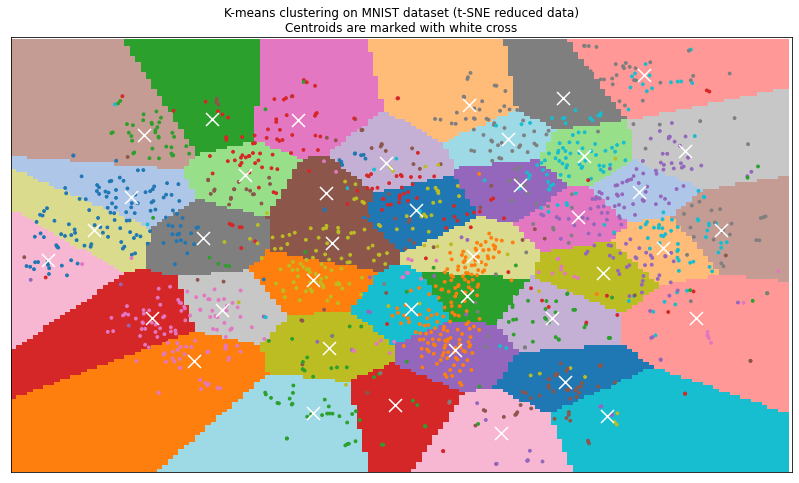

In [11]:
from mllib.visualization  import CVoronoi2DPlot

oVoronoi = CVoronoi2DPlot("K-means clustering on %s dataset (%s reduced data)\n" 
                          "Centroids are marked with white cross" % (sDataName, sDimReductionMethod)
                          ,nReducedSamples, nLabels, p_nGroundTruthClusterCount=10)
oVoronoi.ShowForKMeans(oClusteringModel)